In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Polynomial

$$
P_2(x) = 1 + 2x + 3x^2
$$

In [3]:
def Pn(coefficients: np.ndarray | list, x: float | np.ndarray):
    value = 0.0
    for i in range(len(coefficients)):
        value += coefficients[i] * x ** i
        
    return value


def Pn_v2(coefficients, x):
    value = 0.0
    power = 1.0
    for i in range(len(coefficients)):
        value += coefficients[i] * power
        power *= x
        
    return value

In [4]:
rng = np.random.default_rng(32)
coef = rng.random(10000)

%time Pn(coef, 0.1)

CPU times: user 8.94 ms, sys: 2.01 ms, total: 10.9 ms
Wall time: 10.1 ms


0.22163949710926073

In [22]:
# coef = np.arange(10000)
%time Pn_v2(coef, 0.1)

CPU times: user 5.21 ms, sys: 761 µs, total: 5.97 ms
Wall time: 5.86 ms


0.22163949710926073

In [24]:
x = np.arange(100) * 0.01

y = []

In [25]:
%%time
for x_i in x:
    y.append(Pn(coef, x_i))

CPU times: user 576 ms, sys: 2.88 ms, total: 579 ms
Wall time: 576 ms


In [29]:
%time Pn_v2(coef, x)

CPU times: user 51.2 ms, sys: 1.15 ms, total: 52.3 ms
Wall time: 50.4 ms


array([ 0.16024283,  0.16600317,  0.17184097,  0.17775844,  0.18375796,
        0.18984212,  0.19601374,  0.20227587,  0.20863178,  0.21508504,
        0.2216395 ,  0.22829929,  0.23506889,  0.24195311,  0.24895713,
        0.25608653,  0.2633473 ,  0.27074589,  0.27828919,  0.28598465,
        0.29384021,  0.3018644 ,  0.31006638,  0.31845594,  0.32704356,
        0.33584049,  0.34485873,  0.35411113,  0.36361146,  0.37337441,
        0.3834157 ,  0.39375214,  0.40440168,  0.41538354,  0.42671823,
        0.43842768,  0.45053533,  0.46306624,  0.47604719,  0.48950683,
        0.50347579,  0.51798683,  0.53307503,  0.54877793,  0.56513571,
        0.58219147,  0.59999136,  0.61858494,  0.63802535,  0.65836971,
        0.6796794 ,  0.70202049,  0.7254641 ,  0.7500869 ,  0.77597166,
        0.80320777,  0.83189197,  0.86212903,  0.8940326 ,  0.92772619,
        0.96334417,  1.00103309,  1.04095296,  1.08327894,  1.12820317,
        1.17593685,  1.22671279,  1.28078828,  1.33844848,  1.40

# Regression problem

Given dataset

$$
\{(x_i, y_i)\}_{i=0}^{N-1}
$$

where

$$
y_i = f(x_i)
$$

where $f(x)$ is the underlying function (ground truth / target function).

Regression problem is to find parameters $\theta$ from a model function $f_{\theta}(x)$ that minimize the following least square error:

$$
\min_{\theta} L(\theta) = \min_\theta \frac{1}{2N}\sum_{i=0}^{N-1} \left(f_{\theta}(x_i) - y_i \right)^2
$$

$$
\theta^{k+1} = \theta^k - t \nabla_{\theta}L(\theta^k)
$$

$$
\nabla_{\theta}L(\theta) = \frac{1}{N} \sum_{i=0}^{N-1} \left(f_{\theta}(x_i) - y_i \right) \nabla_{\theta}f_\theta(x_i)
$$

## Linear Regression

Model function:

$$
f_{\theta}(x) = \tanh(wx + b)
$$

$$
\theta = [w, b]
$$

In [95]:
def linear(w: float, b: float, x: np.ndarray):
    return np.tanh(w * x + b)

def grad_w(w, b, x):
    return x / np.cosh(w * x + b) ** 2

def grad_b(w, b, x):
    return 1 / np.cosh(w * x + b) ** 2

In [96]:
def gd_step(params: tuple[float] | list[float], t: float, x: np.ndarray, y: np.ndarray):
    wk, bk = params
    w = wk - t * np.mean((linear(wk, bk, x) - y) * grad_w(wk, bk, x))
    b = bk - t * np.mean((linear(wk, bk, x) - y) * grad_b(wk, bk, x))
    return w, b

In [30]:
def newton_step(params, t, x, y):
    wk, bk = params
    gw = np.mean((linear(wk, bk, x) - y) * grad_w(x))
    gb = np.mean((linear(wk, bk, x) - y) * grad_b(x))

    H = np.zeros((2, 2))
    H[0, 0] = np.mean(grad_w(x) * grad_w(x))
    H[0, 1] = np.mean(grad_w(x) * grad_b(x))
    H[1, 0] = np.mean(grad_b(x) * grad_w(x))
    H[1, 1] = np.mean(grad_b(x) * grad_b(x))
    
    # [gw, gb] shape: (2,)
    # np.dot(np.stack([gw, gb]), np.linalg.inv(H))
    dwb = np.stack([gw, gb]).dot(np.linalg.inv(H))
    
    return wk - t * dwb[0], bk - t * dwb[1]

In [152]:
a, b = np.arange(2), np.arange(2)

np.stack([a, b], axis=0)

array([[0, 1],
       [0, 1]])

# Runge function

Consider the function

$$
R(x) = \frac{1}{1+x^2}, \quad\quad x\in[-5,5]
$$

Let's plot the function first:

In [97]:
x = np.linspace(-5, 5, 100)

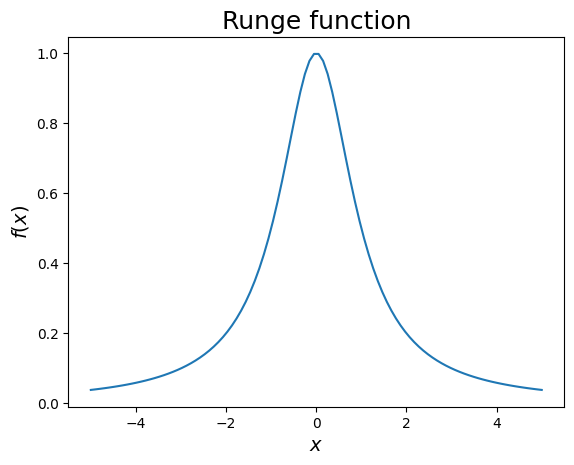

In [98]:
def R(x):
    return 1.0 / (1.0 + x**2)

fig, ax = plt.subplots()
ax.set_title("Runge function", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$f(x)$", fontsize=14)
ax.plot(x, R(x))

In [99]:
def fit(x, y, init_params, init_t, eps=1e-4, max_steps=10000, step_fn=gd_step):
    params, t = init_params, init_t
    
    for step in range(max_steps):
        new_params = step_fn(params, t, x, y)
        diff = np.asarray(new_params) - np.asarray(params)
        if  np.sqrt(np.sum(diff**2)) < eps:
            return new_params, step
        else:
            params = new_params

    return new_params, step

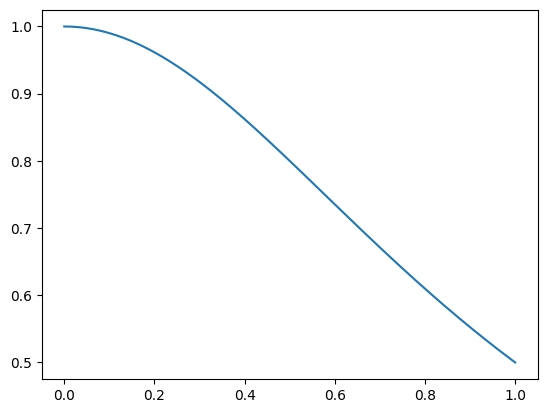

In [128]:
x = np.linspace(0, 1, 1000)
y = R(x)

plt.plot(x, y)

In [142]:
(w_m, b_m), num_steps = fit(x, y, [-10.0, 1.0], 0.001)
num_steps

9999

In [143]:
w_m, b_m

(-9.509704247316924, 2.938312463677004)

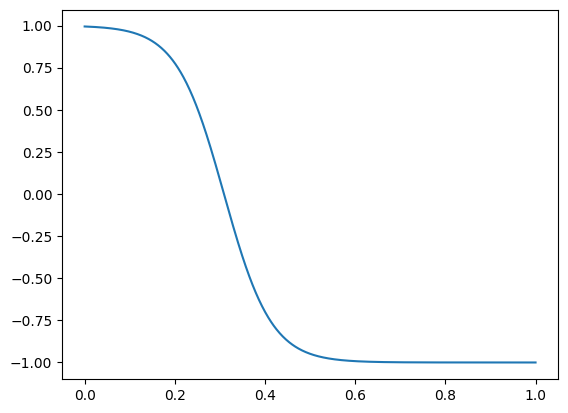

In [144]:
plt.plot(x, linear(w_m, b_m, x))

## General Polynomial fitting with GD

In [41]:
def linear(params: np.ndarray, x: np.ndarray):
    return params[0] * x + params[1]

def quadratic(params: np.ndarray, x: np.ndarray):
    return params[0] * x**2 + params[1] * x + params[2]

# shape x: (N,), grad(x): (N, 2)
def grad_linear(x):
    grad = np.stack([x, np.ones_like(x)], axis=-1)
    return grad
        
# grad(x): (N, 3)
def grad_quad(x):
    grad = np.stack([x**2, x, np.ones_like(x)], axis=-1)
    return grad

def gd_step(params: np.ndarray, t: float, x: np.ndarray, y: np.ndarray):
    params -= t * np.mean((quadratic(params, x) - y)[..., None] * grad_quad(x), axis=0)
    return params

### Create general polynomial model and their grads

In [26]:
for i in reversed(range(1, 3)):
    print(i)

2
1


In [43]:
# Create a n-th order polynomial function
def create_poly_fn(n):
    def poly_fn(params, x):
        assert params.shape[0] == n + 1, f"Number of params should equal {n + 1}"
        value, power = 0.0, 1.0
        for i in range(n + 1):
            value += params[n-i] * power
            power *= x
        return value

    return poly_fn

def create_grad_poly_fn(n):
    def grad_poly_fn(x):
        stack_list = [x**(n-i) for i in range(n)] + [np.ones_like(x)]
        grad = np.stack(stack_list, axis=-1)
        return grad

    return grad_poly_fn


In [61]:
# For example, create 3th order polynomial function and its gradient function
n = 4
poly_fn = create_poly_fn(n)
grad_poly_fn = create_grad_poly_fn(n)

def gd_step(params: np.ndarray, t: float, x: np.ndarray, y: np.ndarray):
    params -= t * np.mean((poly_fn(params, x) - y)[..., None] * grad_poly_fn(x), axis=0)
    return params

In [62]:
def fit(x, y, init_params, init_t, eps=1e-4, max_steps=100000):
    params, t = init_params, init_t
    
    for step in range(max_steps):
        old_params = params.copy()
        params = gd_step(params, t, x, y)
        if  np.sqrt(np.sum((params - old_params)**2)) < eps:
            return params, step

    return params, step

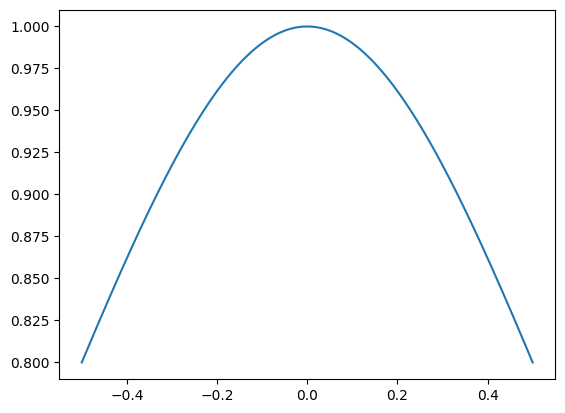

In [68]:
x = np.linspace(-0.5, 0.5, 1000)
y = R(x)

plt.plot(x, y)

In [69]:
params_min, num_steps = fit(x, y, np.array([1.0, 1.0, 1.0, 1.0, 1.0]), 1.0)
params_min, num_steps

(array([ 0.59023321,  0.28118358, -0.94888515, -0.04244048,  0.99899239]),
 3080)

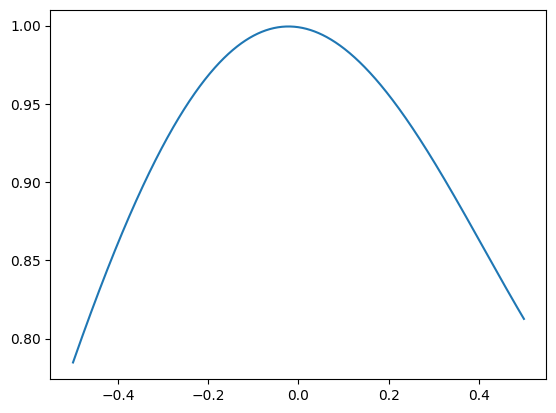

In [70]:
plt.plot(x, poly_fn(params_min, x))